* Step1. Connect to the bucket, get the needed files here 

In [7]:
%%bash
#structure of my storage first 
gsutil ls gs://dsc_luo/fhir

gs://dsc_luo/fhir/
gs://dsc_luo/fhir/output1/
gs://dsc_luo/fhir/output10/
gs://dsc_luo/fhir/output11/
gs://dsc_luo/fhir/output12/
gs://dsc_luo/fhir/output2/
gs://dsc_luo/fhir/output3/
gs://dsc_luo/fhir/output4/
gs://dsc_luo/fhir/output5/
gs://dsc_luo/fhir/output6/
gs://dsc_luo/fhir/output7/
gs://dsc_luo/fhir/output8/
gs://dsc_luo/fhir/output9/


In [8]:
%%bash
gsutil ls gs://dsc_luo/fhir/output1

gs://dsc_luo/fhir/output1/
gs://dsc_luo/fhir/output1/allergies.csv
gs://dsc_luo/fhir/output1/careplans.csv
gs://dsc_luo/fhir/output1/conditions.csv
gs://dsc_luo/fhir/output1/encounters.csv
gs://dsc_luo/fhir/output1/immunizations.csv
gs://dsc_luo/fhir/output1/medications.csv
gs://dsc_luo/fhir/output1/observations.csv
gs://dsc_luo/fhir/output1/patients.csv
gs://dsc_luo/fhir/output1/procedures.csv


In [14]:
#transfer all files here   
!gsutil -m cp gs://dsc_luo/fhir/output1/patients.csv patients1.csv
!gsutil -m cp gs://dsc_luo/fhir/output2/patients.csv patients2.csv
!gsutil -m cp gs://dsc_luo/fhir/output3/patients.csv patients3.csv
!gsutil -m cp gs://dsc_luo/fhir/output4/patients.csv patients4.csv
!gsutil -m cp gs://dsc_luo/fhir/output5/patients.csv patients5.csv
!gsutil -m cp gs://dsc_luo/fhir/output6/patients.csv patients6.csv
!gsutil -m cp gs://dsc_luo/fhir/output7/patients.csv patients7.csv
!gsutil -m cp gs://dsc_luo/fhir/output8/patients.csv patients8.csv
!gsutil -m cp gs://dsc_luo/fhir/output9/patients.csv patients9.csv
!gsutil -m cp gs://dsc_luo/fhir/output10/patients.csv patients10.csv
!gsutil -m cp gs://dsc_luo/fhir/output11/patients.csv patients11.csv
!gsutil -m cp gs://dsc_luo/fhir/output12/patients.csv patients12.csv

Copying gs://dsc_luo/fhir/output1/patients.csv...
/ [1/1 files][ 23.7 MiB/ 23.7 MiB] 100% Done                                    
Operation completed over 1 objects/23.7 MiB.                                     
Copying gs://dsc_luo/fhir/output2/patients.csv...
/ [1/1 files][ 23.8 MiB/ 23.8 MiB] 100% Done                                    
Operation completed over 1 objects/23.8 MiB.                                     
Copying gs://dsc_luo/fhir/output3/patients.csv...
/ [1/1 files][ 23.6 MiB/ 23.6 MiB] 100% Done                                    
Operation completed over 1 objects/23.6 MiB.                                     
Copying gs://dsc_luo/fhir/output4/patients.csv...
/ [1/1 files][ 23.7 MiB/ 23.7 MiB] 100% Done                                    
Operation completed over 1 objects/23.7 MiB.                                     
Copying gs://dsc_luo/fhir/output5/patients.csv...
/ [1/1 files][ 23.8 MiB/ 23.8 MiB] 100% Done                                    
Operation complet

* Step2. Check and concatenate

In [15]:
!ls 

hw1_largeText_grp1.ipynb  patients1.csv  patients5.csv	patients9.csv
patients10.csv		  patients2.csv  patients6.csv
patients11.csv		  patients3.csv  patients7.csv
patients12.csv		  patients4.csv  patients8.csv


In [70]:
%%bash
#examine the file first
head -n 2 patients1.csv #we need ID & RACE column, also something wrong with the first row
head -n 2 patients2.csv #first row, good, rest are good

ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
33f33990-ae8b-4be8-938f-e47ad473abfe,1995-04-05,36d131ee-dd5b-4acb-acbe-19961c32c099,1997-05-18,,,999-84-9382999-69-7030,S99923464,false,Mr.,Nash950,Raynor678,,,,white,italian,M,Boston MA US,,S99943248,X93787069X,Mr.,Jennings258,Mertz249,,,,white,polish,M,Danvers MA US,526 Herzog Parkways Eastham MA 02642 US
ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
d3ae0579-ac2c-48b0-a0c1-a858b63e3b99,2013-12-02,,999-85-8182,,,,Katlynn733,Kulas756,,,,white,scottish,M,North Andover MA US,971 MacGyver Lake Apt. 695 Chatham MA 02633 US


In [22]:
%%bash 
cp patients1.csv patients_all.csv
tail -n +2 patients2.csv >> patients_all.csv
tail -n +2 patients3.csv >> patients_all.csv
tail -n +2 patients4.csv >> patients_all.csv
tail -n +2 patients5.csv >> patients_all.csv
tail -n +2 patients6.csv >> patients_all.csv
tail -n +2 patients7.csv >> patients_all.csv
tail -n +2 patients8.csv >> patients_all.csv
tail -n +2 patients9.csv >> patients_all.csv
tail -n +2 patients10.csv >> patients_all.csv
tail -n +2 patients11.csv >> patients_all.csv
tail -n +2 patients12.csv >> patients_all.csv

* Step3. check # of patients and Race distribution using two methods

In [23]:
%%bash
#how many lines are there
wc -l patients_all.csv # 1,595,051 lines/recordd

1595051 patients_all.csv


#### For patients:

In [102]:
%%bash 
#this match the pattern for id, as we know it '33f33990-ae8b-4be8-938f-e47ad473abfe' all the file
egrep '[[:alnum:]]{8}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{12}' patients_all.csv | wc -l

1592973


In [103]:
%%bash
#slice ID first and then search for the pattern
cat patients_all.csv | cut -d "," -f 1|sed '/^#/d' > patients_all_id.csv #column1
egrep '[[:alnum:]]{8}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{4}-[[:alnum:]]{12}' patients_all_id.csv | wc -l

1592968


In [4]:
df_id = pd.read_csv('patients_all_id.csv')
display(df_id['ID'].nunique())

1593866

We found that these two results are, in general, pretty close (1,592,973 vs 1,592,968). Based on the inital file check in step2, we concluded that there might be multiple patients' id patterns within the same line (for example 'patients.csv' in output1, line2. 'egrep'ing patterns in the 'patients_all.csv' file would count this as multiple, whereas 'egrep'ing patterns in the sliced 'patients_all_id.csv' file only count 1 appearance per line maximum. Either way could be justifiable, but we decided to go with the option where we sliced and counted. **Therefore, our total number of patients is 1,592,968**.

#### For RACE distribution

In [109]:
%%bash 
grep -o ',white,' patients_all.csv  |wc -l
grep -o ',black,' patients_all.csv  |wc -l
grep -o ',hispanic,' patients_all.csv  |wc -l
grep -o ',asian,' patients_all.csv |wc -l
grep -o ',native,' patients_all.csv  |wc -l

1230167
115660
156618
91751
50


In [116]:
%%bash
#slice RACE first and then search for the pattern
cat patients_all.csv | cut -d "," -f 13 |sed '/^#/d' > patients_all_race.csv  #column 13
grep -o '^white$' patients_all_race.csv |wc -l
grep -o '^black$' patients_all_race.csv |wc -l
grep -o '^hispanic$' patients_all_race.csv|wc -l
grep -o '^asian$' patients_all_race.csv |wc -l
grep -o '^native$' patients_all_race.csv  |wc -l

1227774
115475
156326
91579
50


In [118]:
#we further confirm race info sliced 
df_race = pd.read_csv('patients_all_race.csv')
display(df_race['RACE'].value_counts()[:10])

white       1227774
hispanic     156326
black        115475
asian         91579
M               297
irish            86
S                60
native           50
italian          43
english          39
Name: RACE, dtype: int64

So again, 'grep'ing RACE in the 'patients_all.csv' returned us more cases in each category than the 'sliced' option. In order to be consisent with our previous result of total number of patients, we decided to go with the sliced results. Just to verify the 'grep' result, we further read the sliced 'patients_all_race.csv' into pandas and read top 10 counts. We can see that there are some mixed/error entries for RACE, but the counts for 'white, 'hispanic', 'black', 'asian' and 'native' are consistent with 'grep' results. Therefore, the total number for **'white, 'hispanic', 'black', 'asian' and 'native' are 1,227,774, 156,326, 115,475, 91,579, and 50 respectively**. Further w plot the results as below.

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [156]:
#a bit data reformating
race = pd.DataFrame(df_race['RACE'].value_counts())
race1, race2 = race.iloc[0:4, ].copy(),race.iloc[7:8, ].copy()
race = pd.concat([race1,race2])
race.reset_index(inplace = True)
display(race) #sorted already

,index,RACE
0,white,1227774
1,hispanic,156326
2,black,115475
3,asian,91579
4,native,50


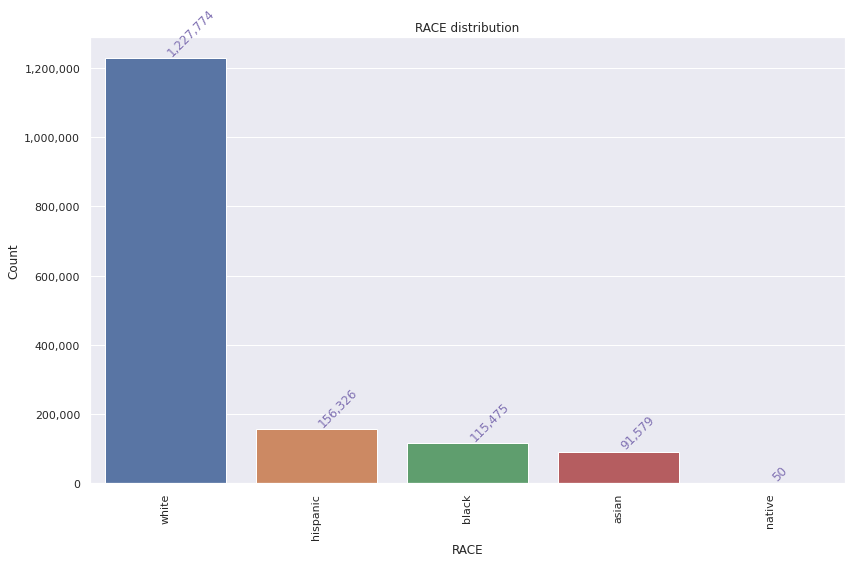

In [160]:
sns.set()
plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(race['index'], race['RACE'])
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="RACE", ylabel='Count')
# add proper Dim values as x labels
ax.set_xticklabels(race['index'])
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(race["RACE"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.title('RACE distribution')
plt.show()

In [175]:
'''
%%bash
ls patients?.csv
ls patients??.csv
'''

patients1.csv
patients2.csv
patients3.csv
patients4.csv
patients5.csv
patients6.csv
patients7.csv
patients8.csv
patients9.csv
patients10.csv
patients11.csv
patients12.csv
